<a href="https://colab.research.google.com/github/Jhairo18/Amazon-Ventas-Limpieza-EDA/blob/main/pandas_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
from google.colab import files
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lectura e informacion de los datos

In [76]:
df = pd.read_csv("/content/drive/MyDrive/000 Areas/python/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [77]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

# Limpieza de los datos


In [79]:
# Cambiando el tipo de precio del precio descontado y del precio actual
df["actual_price"]= df["actual_price"].str.replace("₹","")
df["actual_price"]= df["actual_price"].str.replace(",","")
df["actual_price"]= df["actual_price"].astype("float64")
df["discounted_price"] = df["discounted_price"].str.replace("₹","")
df["discounted_price"] = df["discounted_price"].str.replace(",","")
df["discounted_price"] = df["discounted_price"].astype("float64")

df["discount_percentage"] = df["discount_percentage"].str.replace("%","")
df["discount_percentage"] = df["discount_percentage"].astype("float64")
df["discount_percentage"] = df["discount_percentage"]/100

In [80]:
# Encontrando datos inusuales en columna de rating
df['rating'].value_counts()

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,129
3.9,123
4.4,123
3.8,86
4.5,75
4,52


In [81]:
# Aplicamos un filtro para ver que articulo tiene como rating |
df[df['rating']=="|"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [82]:
# Buscando en la pagina de amazon, vemos que este articulo tiene un rating de 3.9 por lo que le cambiaremos
df["rating"] = df["rating"].str.replace("|","3.9")
df["rating"] = df["rating"].astype("float64")
df["rating_count"] = df["rating_count"].str.replace(",","").astype("float64")

In [83]:
# Observando si hay duplicados
df[df.duplicated()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [84]:
# Viendo si hay valores nulos
df.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [85]:
# Creando un nuevo df con columnas seleccionadas
df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]
df1 = df1.copy()

In [86]:
catsplit = df["category"].str.split("|",expand=True)
catsplit.rename({0:"category1",1:"category2",2:"category3"},axis=1,inplace = True)

In [87]:
df1[["category1","category2","category3"]] = catsplit[["category1","category2","category3"]]
df1.drop("category",axis="columns",inplace=True)

In [88]:
# Observando valores unicos de la categoria 1
df1["category1"].value_counts()

,count
category1,
Electronics,526
Computers&Accessories,453
Home&Kitchen,448
OfficeProducts,31
MusicalInstruments,2
HomeImprovement,2
Toys&Games,1
Car&Motorbike,1
Health&PersonalCare,1


In [89]:
# Arreglando columnas de la categoria 1
df1["category1"] = df1["category1"].str.replace("&"," & ")
df1["category1"] = df1["category1"].str.replace("OfficeProducts","Office Products")
df1["category1"] = df1["category1"].str.replace("MusicalInstruments","Musical Instruments")
df1["category1"] = df1["category1"].str.replace("HomeImprovement","Home Improvement")



In [90]:
# Observando valores unicos de la categoria 2
df1["category2"].value_counts()

,count
category2,
Accessories&Peripherals,381
Kitchen&HomeAppliances,308
"HomeTheater,TV&Video",162
Mobiles&Accessories,161
"Heating,Cooling&AirQuality",116
WearableTechnology,76
"Headphones,Earbuds&Accessories",66
NetworkingDevices,34
OfficePaperProducts,27


In [91]:
# Arreglando columnas de la categoria 2
df1["category2"] = df1["category2"].str.replace("&", " & ")
df1["category2"] = df1["category2"].str.replace("HomeAppliances", "Home Appliances")
df1["category2"] = df1["category2"].str.replace("NetworkingDevices", "Networking Devices")
df1["category2"] = df1["category2"].str.replace("ExternalDevices", "External Devices")
df1["category2"] = df1["category2"].str.replace("DataStorage", "Data Storage")
df1["category2"] = df1["category2"].str.replace("HomeStorage", "Home Storage")
df1["category2"] = df1["category2"].str.replace("GeneralPurposeBatteries", "General Purpose Batteries")
df1["category2"] = df1["category2"].str.replace("BatteryChargers", "Battery Chargers")
df1["category2"] = df1["category2"].str.replace("HomeAudio", "Home Audio")
df1["category2"] = df1["category2"].str.replace("CarAccessories", "Car Accessories")
df1["category2"] = df1["category2"].str.replace("HomeMedicalSupplies", "Home Medical Supplies")
df1["category2"] = df1["category2"].str.replace("PowerAccessories", "Power Accessories")
df1["category2"] = df1["category2"].str.replace("OfficePaperProducts", "Office Paper Products")


In [92]:
rating_score = []
for score in df1["rating"]:
  if   score<2.0: rating_score.append("Pobre")
  elif score<3.0: rating_score.append("Debajo del promedio")
  elif score<4.0: rating_score.append("Promedio")
  elif score<5.0: rating_score.append("Encima del promedio")
  elif score<6.0: rating_score.append("Excelente")


In [93]:
df1["rating_score"] = rating_score
df1["rating_score"] = df1["rating_score"].astype("category")
df1["difference_price"] = df1["actual_price"] - df1["discounted_price"]
df1.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category1,category2,category3,rating_score,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Encima del promedio,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Encima del promedio,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Promedio,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Encima del promedio,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Encima del promedio,245.0


# Exploracion de la data


In [94]:
sns.set_style(style='darkgrid')
sns.set_palette(palette="deep")

## Observación 1

In [95]:
# Haciendo una tabla dinamica que nos muestre la cantidad de la principal y subcategoria
# para tener una mejor panorama a la hora de la visualización de datos

prin_sub = df1[["category1","category2","product_id"]]
prin_sub = prin_sub.rename({"category1":"Categoria principal","category2":"Subcategoria","product_id":"Product ID"},axis=1)
prin_sub_pv = pd.pivot_table(prin_sub,index=["Categoria principal","Subcategoria"],aggfunc="count")
prin_sub_pv

Product ID
Categoria principal     Subcategoria                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers,Inks & Accessories                           11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones,Earbuds & Accessories                      66
                        Home Audio                                            16
                        HomeTheater,TV & Video                               162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        WearableTechnology                                    76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          CraftMaterials                                         7
                        Heating,Cooling & AirQuality                         116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Paper Products                                 27
                        OfficeElectronics                                      4
Toys & Games            Arts & Crafts                                          1

In [96]:
df1
principales_items = df1["category1"].value_counts().head(5).reset_index(name='counts')
principales_subitems = df1["category2"].value_counts().head(5).reset_index(name='counts')
principales_items

,category1,counts
0,Electronics,526
1,Computers & Accessories,453
2,Home & Kitchen,448
3,Office Products,31
4,Musical Instruments,2


Text(0.5, 0, 'Cantidad')

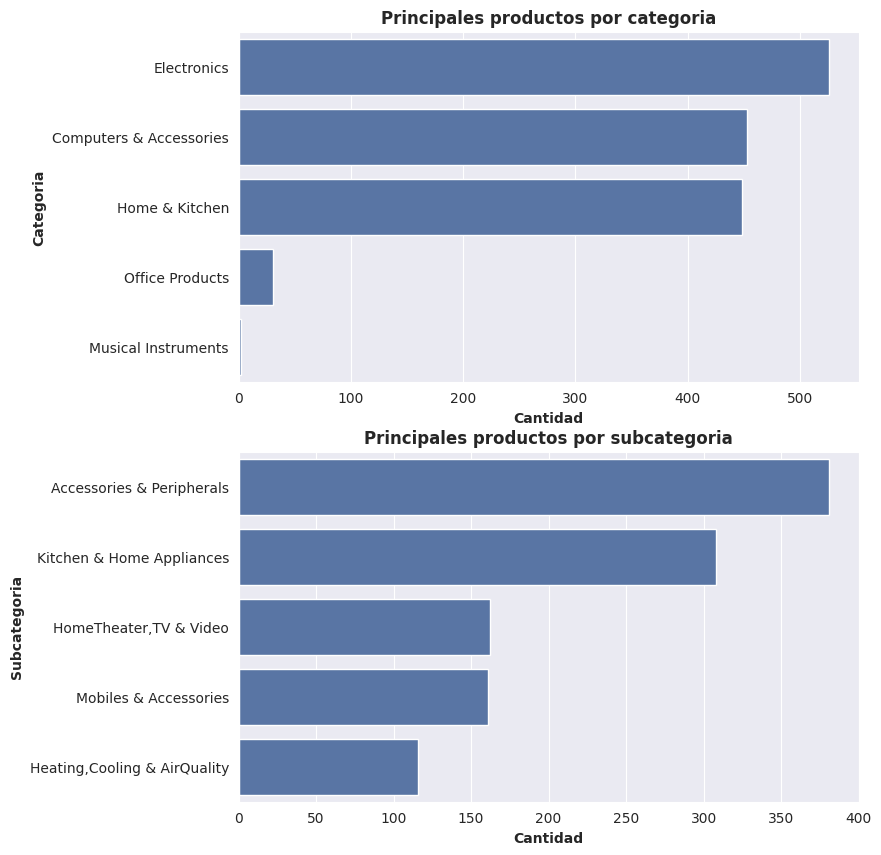

In [97]:
plt.figure(figsize=(8, 10))
plt.subplot(2,1,1)
sns.barplot(x="counts",y="category1",data=principales_items)
plt.title("Principales productos por categoria",fontweight="bold")
plt.xlabel("Cantidad",fontweight="bold")
plt.ylabel("Categoria",fontweight="bold")
plt.subplot(2,1,2)
sns.barplot(x="counts",y="category2",data = principales_subitems)
plt.title("Principales productos por subcategoria",fontweight="bold")
plt.ylabel("Subcategoria",fontweight="bold")
plt.xlabel("Cantidad",fontweight="bold")

De esto observamos que las **principales categorias** son las de **electronica, accesorios y computadoras y casa/oficina**. Dentro de las cuales destacan los **accesorios/perifericos y aplicaciones de casa,** las cuales corresponden a las categorias de electronica y casa/oficina respectivamente

In [98]:
df1
PromCategoria = df1.groupby("category1")["actual_price"].mean().reset_index().rename({"category1":"categoria","actual_price":"precio promedio"},axis=1)
PromCategoria["precio promedio"] = PromCategoria["precio promedio"].round(2)
PromCategoria.sort_values(by="precio promedio",ascending=False,inplace=True)
PromCategoria.loc[[2,4,1,7,6]]

,categoria,precio promedio
2,Electronics,10127.31
4,Home & Kitchen,4162.07
1,Computers & Accessories,1683.62
7,Office Products,397.19
6,Musical Instruments,1347.00


Ademas se observa que la **categoria que tiene más cantidades**, es decir, la electronica tiene el precio promedio supera a las demás, teniendo un valor de 10127.31.



## Observación 2

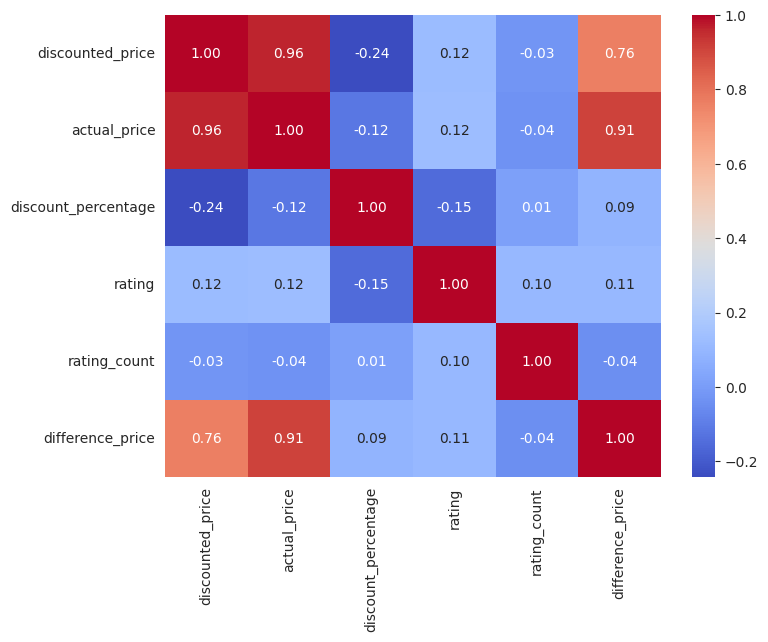

In [99]:
df1_numeric = df1.select_dtypes(include=['number'])
# Crear el heatmap
plt.figure(figsize=(8,6))  # Opcional, para ajustar el tamaño del gráfico
sns.heatmap(data=df1_numeric.corr(), cmap="coolwarm",annot=True, fmt=".2f")
plt.show()

Text(0, 0.5, 'Precio descontado')

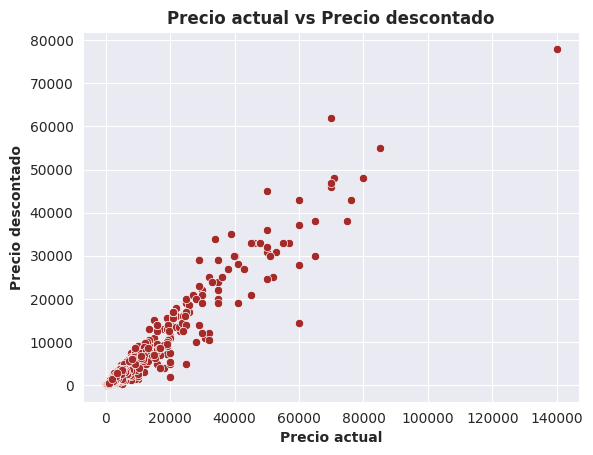

In [100]:
sns.scatterplot(x = "actual_price",y = "discounted_price",data = df1,color="brown")
plt.title("Precio actual vs Precio descontado",fontweight="bold")
plt.xlabel("Precio actual",fontweight="bold")
plt.ylabel("Precio descontado",fontweight="bold")


Vemos una correlacion fuerte **(valor de 0.96)** entre el precio actual y el precio descontado. Esto quiere decir que mientras más sea el precio actual más sera el precio descontado, y a la inversa también.

## Observación 3


In [101]:
df1.head(5)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category1,category2,category3,rating_score,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Encima del promedio,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Encima del promedio,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Promedio,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Encima del promedio,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Encima del promedio,245.0


Text(0, 0.5, 'Cantidad')

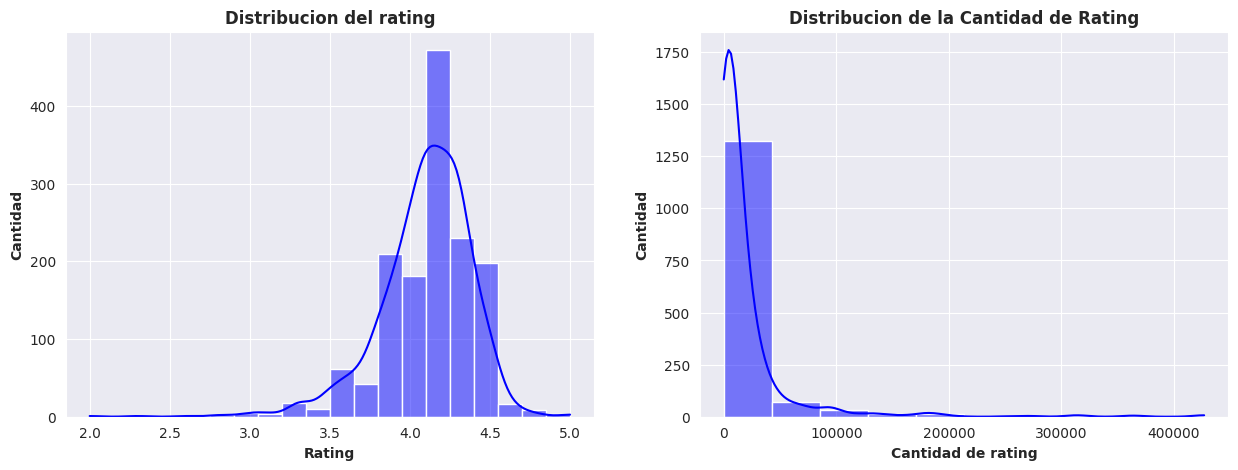

In [102]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x = "rating",data=df1,kde=True,color="Blue",bins=20)
plt.title("Distribucion del rating",fontweight="bold")
plt.xlabel("Rating",fontweight="bold")
plt.ylabel("Cantidad",fontweight="bold")
plt.subplot(1,2,2)
sns.histplot(x="rating_count",data=df1,kde=True,color="Blue",bins=10)
plt.title("Distribucion de la Cantidad de Rating",fontweight="bold")
plt.xlabel("Cantidad de rating",fontweight="bold")
plt.ylabel("Cantidad",fontweight="bold")

Se observa que el rating que se tiene más incidencia está entre **4 y 4.5** de 5 lo cual indica que los clientes generalmente estan satisfechos.



In [103]:
df_rating_score = df1["rating_score"].value_counts().reset_index()
df_rating_score["porcentaje"] = df_rating_score["count"]/df_rating_score["count"].sum()
df_rating_score

,rating_score,count,porcentaje
0,Encima del promedio,1107,0.755631
1,Promedio,349,0.238225
2,Debajo del promedio,6,0.004096
3,Excelente,3,0.002048


Text(0.5, 1.0, 'Rating de todos los productos en porcentaje')

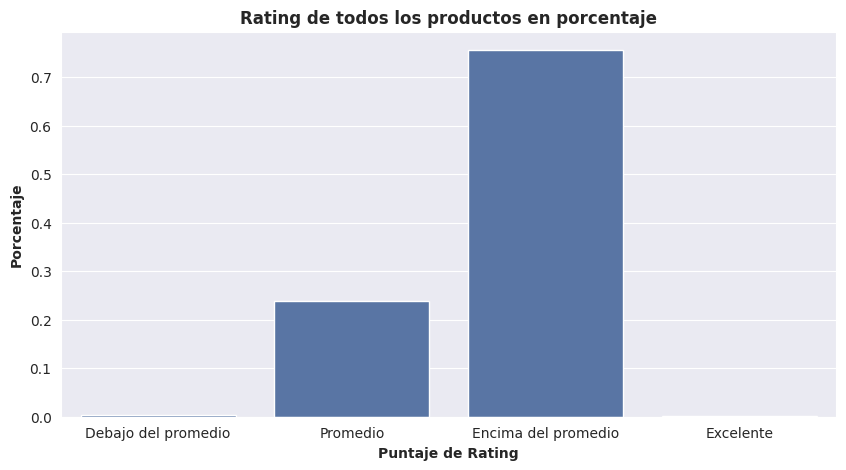

In [104]:
rating_ordenado = ["Debajo del promedio","Promedio","Encima del promedio","Excelente"]
plt.figure(figsize=(10,5))
sns.barplot(x="rating_score",y="porcentaje",data=df_rating_score,order=rating_ordenado)
plt.xlabel("Puntaje de Rating",fontweight="bold")
plt.ylabel("Porcentaje",fontweight="bold")
plt.title("Rating de todos los productos en porcentaje",fontweight="bold")

Corroborando con la anterior información vemos que se tienen más productos con una **valoración por encima del promedio (4-5) más del 70%.** Lo cual es un buen indicador

In [105]:
rating_count = df1['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')
rating_count

,rating,counts
0,Encima del promedio,0.755631
1,Promedio,0.238225
2,Debajo del promedio,0.004096
3,Excelente,0.002048
